In [1]:
import pandas as pd
import datetime
import json
import numpy as np

In [2]:
with open('transaction-data-adhoc-analysis.json','r') as f:
    data=json.load(f)

In [3]:
transactionsdf=pd.DataFrame(data)

In [4]:
transactionsdf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [5]:
transaction_item_per_month_df=transactionsdf[["transaction_items","transaction_value","transaction_date"]]

In [6]:
transaction_item_per_month_df['month'] = pd.DatetimeIndex(transaction_item_per_month_df['transaction_date']).month

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_8379/2693879804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_item_per_month_df['month'] = pd.DatetimeIndex(transaction_item_per_month_df['transaction_date']).month


In [7]:
transactions=transaction_item_per_month_df.transaction_items.str.split(';', expand=True)

In [8]:
transactions

,0,1,2
0,"Exotic Extras,Beef Chicharon,(x4)",None,None
1,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)"
2,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None
3,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None
4,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)"
...,...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2)","HealthyKid 3+,Nutrional Milk,(x1)",None
83032,"HealthyKid 3+,Yummy Vegetables,(x1)","Exotic Extras,Kimchi and Seaweed,(x1)","Candy City,Orange Beans,(x4)"
83033,"Candy City,Orange Beans,(x4)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Yummy Vegetables,(x4)"
83034,"HealthyKid 3+,Nutrional Milk,(x2)","Candy City,Gummy Worms,(x2)",None


In [9]:
def reformat(x): #add in python files submission
    if x==None:
        return str("None,0")
    x_1=x.split(",")
    x_final=x_1[0] + ":" + x_1[1] +","+ x_1[2]
    return x_final

In [10]:
transactions["new0"]=transactions[0].apply(reformat)

In [11]:
transactions["new1"]=transactions[1].apply(reformat)

In [12]:
transactions["new2"]=transactions[2].apply(reformat)

In [13]:
transactions

,0,1,2,new0,new1,new2
0,"Exotic Extras,Beef Chicharon,(x4)",None,None,"Exotic Extras:Beef Chicharon,(x4)","None,0","None,0"
1,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)","Exotic Extras:Beef Chicharon,(x3)","HealthyKid 3+:Nutrional Milk,(x4)","Candy City:Orange Beans,(x1)"
2,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None,"HealthyKid 3+:Gummy Vitamins,(x3)","HealthyKid 3+:Yummy Vegetables,(x2)","None,0"
3,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None,"HealthyKid 3+:Yummy Vegetables,(x1)","None,0","None,0"
4,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)","Candy City:Orange Beans,(x3)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Gummy Vitamins,(x1)"
...,...,...,...,...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2)","HealthyKid 3+,Nutrional Milk,(x1)",None,"Exotic Extras:Kimchi and Seaweed,(x2)","HealthyKid 3+:Nutrional Milk,(x1)","None,0"
83032,"HealthyKid 3+,Yummy Vegetables,(x1)","Exotic Extras,Kimchi and Seaweed,(x1)","Candy City,Orange Beans,(x4)","HealthyKid 3+:Yummy Vegetables,(x1)","Exotic Extras:Kimchi and Seaweed,(x1)","Candy City:Orange Beans,(x4)"
83033,"Candy City,Orange Beans,(x4)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Yummy Vegetables,(x4)","Candy City:Orange Beans,(x4)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Yummy Vegetables,(x4)"
83034,"HealthyKid 3+,Nutrional Milk,(x2)","Candy City,Gummy Worms,(x2)",None,"HealthyKid 3+:Nutrional Milk,(x2)","Candy City:Gummy Worms,(x2)","None,0"


In [14]:
transactions.drop(0,inplace=True, axis=1)

In [15]:
transactions.drop(1,inplace=True, axis=1)

In [16]:
transactions.drop(2,inplace=True, axis=1)

In [17]:
transactions

,new0,new1,new2
0,"Exotic Extras:Beef Chicharon,(x4)","None,0","None,0"
1,"Exotic Extras:Beef Chicharon,(x3)","HealthyKid 3+:Nutrional Milk,(x4)","Candy City:Orange Beans,(x1)"
2,"HealthyKid 3+:Gummy Vitamins,(x3)","HealthyKid 3+:Yummy Vegetables,(x2)","None,0"
3,"HealthyKid 3+:Yummy Vegetables,(x1)","None,0","None,0"
4,"Candy City:Orange Beans,(x3)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Gummy Vitamins,(x1)"
...,...,...,...
83031,"Exotic Extras:Kimchi and Seaweed,(x2)","HealthyKid 3+:Nutrional Milk,(x1)","None,0"
83032,"HealthyKid 3+:Yummy Vegetables,(x1)","Exotic Extras:Kimchi and Seaweed,(x1)","Candy City:Orange Beans,(x4)"
83033,"Candy City:Orange Beans,(x4)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Yummy Vegetables,(x4)"
83034,"HealthyKid 3+:Nutrional Milk,(x2)","Candy City:Gummy Worms,(x2)","None,0"


In [18]:
transactions[["revise0","Quantity1"]]=transactions.new0.str.split(',', expand=True)

In [19]:
transactions[["revise1","Quantity2"]]=transactions.new1.str.split(',', expand=True)

In [20]:
transactions[["revise2","Quantity3"]]=transactions.new2.str.split(',', expand=True)

In [21]:
transactions

,new0,new1,new2,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3
0,"Exotic Extras:Beef Chicharon,(x4)","None,0","None,0",Exotic Extras:Beef Chicharon,(x4),None,0,None,0
1,"Exotic Extras:Beef Chicharon,(x3)","HealthyKid 3+:Nutrional Milk,(x4)","Candy City:Orange Beans,(x1)",Exotic Extras:Beef Chicharon,(x3),HealthyKid 3+:Nutrional Milk,(x4),Candy City:Orange Beans,(x1)
2,"HealthyKid 3+:Gummy Vitamins,(x3)","HealthyKid 3+:Yummy Vegetables,(x2)","None,0",HealthyKid 3+:Gummy Vitamins,(x3),HealthyKid 3+:Yummy Vegetables,(x2),None,0
3,"HealthyKid 3+:Yummy Vegetables,(x1)","None,0","None,0",HealthyKid 3+:Yummy Vegetables,(x1),None,0,None,0
4,"Candy City:Orange Beans,(x3)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Gummy Vitamins,(x1)",Candy City:Orange Beans,(x3),Candy City:Gummy Worms,(x4),HealthyKid 3+:Gummy Vitamins,(x1)
...,...,...,...,...,...,...,...,...,...
83031,"Exotic Extras:Kimchi and Seaweed,(x2)","HealthyKid 3+:Nutrional Milk,(x1)","None,0",Exotic Extras:Kimchi and Seaweed,(x2),HealthyKid 3+:Nutrional Milk,(x1),None,0
83032,"HealthyKid 3+:Yummy Vegetables,(x1)","Exotic Extras:Kimchi and Seaweed,(x1)","Candy City:Orange Beans,(x4)",HealthyKid 3+:Yummy Vegetables,(x1),Exotic Extras:Kimchi and Seaweed,(x1),Candy City:Orange Beans,(x4)
83033,"Candy City:Orange Beans,(x4)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Yummy Vegetables,(x4)",Candy City:Orange Beans,(x4),Candy City:Gummy Worms,(x4),HealthyKid 3+:Yummy Vegetables,(x4)
83034,"HealthyKid 3+:Nutrional Milk,(x2)","Candy City:Gummy Worms,(x2)","None,0",HealthyKid 3+:Nutrional Milk,(x2),Candy City:Gummy Worms,(x2),None,0


In [22]:
transactions.drop("new0",inplace=True, axis=1)

In [23]:
transactions.drop("new1",inplace=True, axis=1)

In [24]:
transactions.drop("new2",inplace=True, axis=1)

In [25]:
transactions

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3
0,Exotic Extras:Beef Chicharon,(x4),None,0,None,0
1,Exotic Extras:Beef Chicharon,(x3),HealthyKid 3+:Nutrional Milk,(x4),Candy City:Orange Beans,(x1)
2,HealthyKid 3+:Gummy Vitamins,(x3),HealthyKid 3+:Yummy Vegetables,(x2),None,0
3,HealthyKid 3+:Yummy Vegetables,(x1),None,0,None,0
4,Candy City:Orange Beans,(x3),Candy City:Gummy Worms,(x4),HealthyKid 3+:Gummy Vitamins,(x1)
...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,(x2),HealthyKid 3+:Nutrional Milk,(x1),None,0
83032,HealthyKid 3+:Yummy Vegetables,(x1),Exotic Extras:Kimchi and Seaweed,(x1),Candy City:Orange Beans,(x4)
83033,Candy City:Orange Beans,(x4),Candy City:Gummy Worms,(x4),HealthyKid 3+:Yummy Vegetables,(x4)
83034,HealthyKid 3+:Nutrional Milk,(x2),Candy City:Gummy Worms,(x2),None,0


In [26]:
def replace_2(y):#add in python files submission
    
    if y=="0":
        return str("0")
    
    else:
        new_y=y.replace("(","")
        new_y2=new_y.replace(")","")
        new_y3=new_y2.replace("x","")
    return new_y3

In [27]:
transactions["Quantity1"]=transactions["Quantity1"].apply(replace_2)

In [28]:
transactions["Quantity2"]=transactions["Quantity2"].apply(replace_2)

In [29]:
transactions["Quantity3"]=transactions["Quantity3"].apply(replace_2)

In [30]:
transactions

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3
0,Exotic Extras:Beef Chicharon,4,None,0,None,0
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1
...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,HealthyKid 3+:Nutrional Milk,1,None,0
83032,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Kimchi and Seaweed,1,Candy City:Orange Beans,4
83033,Candy City:Orange Beans,4,Candy City:Gummy Worms,4,HealthyKid 3+:Yummy Vegetables,4
83034,HealthyKid 3+:Nutrional Milk,2,Candy City:Gummy Worms,2,None,0


In [31]:
def convert(x):#add in python files submission
    int1=int(x)
    return int1

In [32]:
transactions["Quantity1"]=transactions["Quantity1"].apply(convert)

In [33]:
transactions["Quantity2"]=transactions["Quantity2"].apply(convert)

In [34]:
transactions["Quantity3"]=transactions["Quantity3"].apply(convert)

In [35]:
transactions

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3
0,Exotic Extras:Beef Chicharon,4,None,0,None,0
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1
...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,HealthyKid 3+:Nutrional Milk,1,None,0
83032,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Kimchi and Seaweed,1,Candy City:Orange Beans,4
83033,Candy City:Orange Beans,4,Candy City:Gummy Worms,4,HealthyKid 3+:Yummy Vegetables,4
83034,HealthyKid 3+:Nutrional Milk,2,Candy City:Gummy Worms,2,None,0


In [36]:
transactions["month"]=transaction_item_per_month_df["month"]

In [37]:
transactions["value"]=transaction_item_per_month_df["transaction_value"]

In [38]:
transactions

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3,month,value
0,Exotic Extras:Beef Chicharon,4,None,0,None,0,1,5196
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1,1,12056
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0,1,5500
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0,1,500
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1,1,2697
...,...,...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,HealthyKid 3+:Nutrional Milk,1,None,0,6,3588
83032,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Kimchi and Seaweed,1,Candy City:Orange Beans,4,6,2095
83033,Candy City:Orange Beans,4,Candy City:Gummy Worms,4,HealthyKid 3+:Yummy Vegetables,4,6,3396
83034,HealthyKid 3+:Nutrional Milk,2,Candy City:Gummy Worms,2,None,0,6,4280


In [39]:
transactions.head(20)

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3,month,value
0,Exotic Extras:Beef Chicharon,4,None,0,None,0,1,5196
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1,1,12056
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0,1,5500
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0,1,500
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1,1,2697
5,HealthyKid 3+:Nutrional Milk,1,HealthyKid 3+:Yummy Vegetables,2,None,0,1,2990
6,Exotic Extras:Kimchi and Seaweed,4,None,0,None,0,1,3196
7,HealthyKid 3+:Gummy Vitamins,2,HealthyKid 3+:Nutrional Milk,2,None,0,1,6980
8,Candy City:Gummy Worms,1,None,0,None,0,1,150
9,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Beef Chicharon,4,HealthyKid 3+:Gummy Vitamins,3,1,10196


In [40]:
# 1- Chicharon, 2- Nutritional Milk, 3- Orange Beans, 4- Gummy Vitamins, 5- Yummy Vegetables, 6 - Gummy Worms, 7 - Kimchi and Seaweed
A =np.array([[4,0,0,0,0,0,0],
            [3,4,1,0,0,0,0],
            [0,0,0,3,2,0,0],
            [0,0,0,0,1,0,0],
            [0,0,3,1,0,4,0],
            [0,1,0,0,2,0,0],
            [0,0,0,0,0,0,4]])

B=np.array([5196,12056,5500,500,2697,2990,3196])

C=np.linalg.solve(A,B)

In [41]:
print(C)

[1299. 1990.  199. 1500.  500.  150.  799.]


In [42]:
def get_transaction_value(x):
    if x=="Candy City:Gummy Worms":
        return int(150)
    elif x=="Candy City:Orange Beans":
        return int(199)
    elif x=="Exotic Extras:Beef Chicharon":
        return int(1299)
    elif x=="Exotic Extras:Kimchi and Seaweed":
        return int(799)
    elif x=="HealthyKid 3+:Gummy Vitamins":
        return int(1500)
    elif x=="HealthyKid 3+:Nutrional Milk":
        return int(1990)
    elif x=="HealthyKid 3+:Yummy Vegetables":
        return int(500)
    elif x=="None":
        return int(0)
    

In [43]:
transactions["Transaction1"]=transactions["revise0"].apply(get_transaction_value)

In [44]:
transactions["Transaction2"]=transactions["revise1"].apply(get_transaction_value)

In [45]:
transactions["Transaction3"]=transactions["revise2"].apply(get_transaction_value)

In [46]:
transactions

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3,month,value,Transaction1,Transaction2,Transaction3
0,Exotic Extras:Beef Chicharon,4,None,0,None,0,1,5196,1299,0,0
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1,1,12056,1299,1990,199
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0,1,5500,1500,500,0
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0,1,500,500,0,0
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1,1,2697,199,150,1500
...,...,...,...,...,...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,HealthyKid 3+:Nutrional Milk,1,None,0,6,3588,799,1990,0
83032,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Kimchi and Seaweed,1,Candy City:Orange Beans,4,6,2095,500,799,199
83033,Candy City:Orange Beans,4,Candy City:Gummy Worms,4,HealthyKid 3+:Yummy Vegetables,4,6,3396,199,150,500
83034,HealthyKid 3+:Nutrional Milk,2,Candy City:Gummy Worms,2,None,0,6,4280,1990,150,0


In [47]:
transactions[["revise0","Quantity1","Transaction1","revise1","Quantity2","Transaction2","revise2","Quantity3","Transaction3","month" ,"value"]]

,revise0,Quantity1,Transaction1,revise1,Quantity2,Transaction2,revise2,Quantity3,Transaction3,month,value
0,Exotic Extras:Beef Chicharon,4,1299,None,0,0,None,0,0,1,5196
1,Exotic Extras:Beef Chicharon,3,1299,HealthyKid 3+:Nutrional Milk,4,1990,Candy City:Orange Beans,1,199,1,12056
2,HealthyKid 3+:Gummy Vitamins,3,1500,HealthyKid 3+:Yummy Vegetables,2,500,None,0,0,1,5500
3,HealthyKid 3+:Yummy Vegetables,1,500,None,0,0,None,0,0,1,500
4,Candy City:Orange Beans,3,199,Candy City:Gummy Worms,4,150,HealthyKid 3+:Gummy Vitamins,1,1500,1,2697
...,...,...,...,...,...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,799,HealthyKid 3+:Nutrional Milk,1,1990,None,0,0,6,3588
83032,HealthyKid 3+:Yummy Vegetables,1,500,Exotic Extras:Kimchi and Seaweed,1,799,Candy City:Orange Beans,4,199,6,2095
83033,Candy City:Orange Beans,4,199,Candy City:Gummy Worms,4,150,HealthyKid 3+:Yummy Vegetables,4,500,6,3396
83034,HealthyKid 3+:Nutrional Milk,2,1990,Candy City:Gummy Worms,2,150,None,0,0,6,4280


In [48]:
transactions["transaction_value_1"]=transactions["Quantity1"]*transactions["Transaction1"]

In [49]:
transactions["transaction_value_2"]=transactions["Quantity2"]*transactions["Transaction2"]

In [52]:
transactions["transaction_value_3"]=transactions["Quantity3"]*transactions["Transaction3"]

In [53]:
transactions

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3,month,value,Transaction1,Transaction2,Transaction3,transaction_value_1,transaction_value_2,transaction_value_3
0,Exotic Extras:Beef Chicharon,4,None,0,None,0,1,5196,1299,0,0,5196,0,0
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1,1,12056,1299,1990,199,3897,7960,199
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0,1,5500,1500,500,0,4500,1000,0
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0,1,500,500,0,0,500,0,0
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1,1,2697,199,150,1500,597,600,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,HealthyKid 3+:Nutrional Milk,1,None,0,6,3588,799,1990,0,1598,1990,0
83032,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Kimchi and Seaweed,1,Candy City:Orange Beans,4,6,2095,500,799,199,500,799,796
83033,Candy City:Orange Beans,4,Candy City:Gummy Worms,4,HealthyKid 3+:Yummy Vegetables,4,6,3396,199,150,500,796,600,2000
83034,HealthyKid 3+:Nutrional Milk,2,Candy City:Gummy Worms,2,None,0,6,4280,1990,150,0,3980,300,0


In [54]:
transactions.drop("Quantity1",inplace=True, axis=1)

In [55]:
transactions.drop("Quantity2",inplace=True, axis=1)

In [56]:
transactions.drop("Quantity3",inplace=True, axis=1)

In [57]:
transactions.drop("Transaction1",inplace=True, axis=1)

In [58]:
transactions.drop("Transaction2",inplace=True, axis=1)

In [59]:
transactions.drop("Transaction3",inplace=True, axis=1)

In [60]:
transactions

,revise0,revise1,revise2,month,value,transaction_value_1,transaction_value_2,transaction_value_3
0,Exotic Extras:Beef Chicharon,None,None,1,5196,5196,0,0
1,Exotic Extras:Beef Chicharon,HealthyKid 3+:Nutrional Milk,Candy City:Orange Beans,1,12056,3897,7960,199
2,HealthyKid 3+:Gummy Vitamins,HealthyKid 3+:Yummy Vegetables,None,1,5500,4500,1000,0
3,HealthyKid 3+:Yummy Vegetables,None,None,1,500,500,0,0
4,Candy City:Orange Beans,Candy City:Gummy Worms,HealthyKid 3+:Gummy Vitamins,1,2697,597,600,1500
...,...,...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,HealthyKid 3+:Nutrional Milk,None,6,3588,1598,1990,0
83032,HealthyKid 3+:Yummy Vegetables,Exotic Extras:Kimchi and Seaweed,Candy City:Orange Beans,6,2095,500,799,796
83033,Candy City:Orange Beans,Candy City:Gummy Worms,HealthyKid 3+:Yummy Vegetables,6,3396,796,600,2000
83034,HealthyKid 3+:Nutrional Milk,Candy City:Gummy Worms,None,6,4280,3980,300,0


In [61]:
trasnsaction_value_final1=transactions[["revise0","transaction_value_1","month"]]

In [62]:
trasnsaction_value_final1

,revise0,transaction_value_1,month
0,Exotic Extras:Beef Chicharon,5196,1
1,Exotic Extras:Beef Chicharon,3897,1
2,HealthyKid 3+:Gummy Vitamins,4500,1
3,HealthyKid 3+:Yummy Vegetables,500,1
4,Candy City:Orange Beans,597,1
...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,1598,6
83032,HealthyKid 3+:Yummy Vegetables,500,6
83033,Candy City:Orange Beans,796,6
83034,HealthyKid 3+:Nutrional Milk,3980,6


In [63]:
trasnsaction_value_final2=transactions[["revise1","transaction_value_2","month"]]

In [64]:
trasnsaction_value_final2

,revise1,transaction_value_2,month
0,None,0,1
1,HealthyKid 3+:Nutrional Milk,7960,1
2,HealthyKid 3+:Yummy Vegetables,1000,1
3,None,0,1
4,Candy City:Gummy Worms,600,1
...,...,...,...
83031,HealthyKid 3+:Nutrional Milk,1990,6
83032,Exotic Extras:Kimchi and Seaweed,799,6
83033,Candy City:Gummy Worms,600,6
83034,Candy City:Gummy Worms,300,6


In [65]:
trasnsaction_value_final3=transactions[["revise2","transaction_value_3","month"]]

In [66]:
trasnsaction_value_final3

,revise2,transaction_value_3,month
0,None,0,1
1,Candy City:Orange Beans,199,1
2,None,0,1
3,None,0,1
4,HealthyKid 3+:Gummy Vitamins,1500,1
...,...,...,...
83031,None,0,6
83032,Candy City:Orange Beans,796,6
83033,HealthyKid 3+:Yummy Vegetables,2000,6
83034,None,0,6


In [67]:
trasnsaction_value_final1.rename(columns = {"revise0":"Items", "transaction_value_1":"Sales Value"}, inplace = True)

/Users/salvadorfamily/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [68]:
trasnsaction_value_final1

,Items,Sales Value,month
0,Exotic Extras:Beef Chicharon,5196,1
1,Exotic Extras:Beef Chicharon,3897,1
2,HealthyKid 3+:Gummy Vitamins,4500,1
3,HealthyKid 3+:Yummy Vegetables,500,1
4,Candy City:Orange Beans,597,1
...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,1598,6
83032,HealthyKid 3+:Yummy Vegetables,500,6
83033,Candy City:Orange Beans,796,6
83034,HealthyKid 3+:Nutrional Milk,3980,6


In [69]:
trasnsaction_value_final2.rename(columns = {"revise1":"Items", "transaction_value_2":"Sales Value"}, inplace = True)

/Users/salvadorfamily/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [70]:
trasnsaction_value_final3.rename(columns = {"revise2":"Items", "transaction_value_3":"Sales Value"}, inplace = True)

In [71]:
trasnsaction_value_final2

,Items,Sales Value,month
0,None,0,1
1,HealthyKid 3+:Nutrional Milk,7960,1
2,HealthyKid 3+:Yummy Vegetables,1000,1
3,None,0,1
4,Candy City:Gummy Worms,600,1
...,...,...,...
83031,HealthyKid 3+:Nutrional Milk,1990,6
83032,Exotic Extras:Kimchi and Seaweed,799,6
83033,Candy City:Gummy Worms,600,6
83034,Candy City:Gummy Worms,300,6


In [72]:
trasnsaction_value_final3

,Items,Sales Value,month
0,None,0,1
1,Candy City:Orange Beans,199,1
2,None,0,1
3,None,0,1
4,HealthyKid 3+:Gummy Vitamins,1500,1
...,...,...,...
83031,None,0,6
83032,Candy City:Orange Beans,796,6
83033,HealthyKid 3+:Yummy Vegetables,2000,6
83034,None,0,6


In [73]:
trial_table_1=pd.pivot_table(trasnsaction_value_final1, values=["Sales Value"], index=["Items"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [74]:
trial_table_1

Sales Value                             \
month                                      1        2        3        4   
Items                                                                     
Candy City:Gummy Worms                726600   722700   776700   732150   
Candy City:Orange Beans               984453  1027238   951817   991418   
Exotic Extras:Beef Chicharon         6439143  6623601  6252087  6362502   
Exotic Extras:Kimchi and Seaweed     3880743  3899919  4032553  3892728   
HealthyKid 3+:Gummy Vitamins         7279500  7617000  7630500  7288500   
HealthyKid 3+:Nutrional Milk         9661450  9639560  9466430  9522150   
HealthyKid 3+:Yummy Vegetables       2540000  2465000  2444000  2520500   

                                                    
month                                   5        6  
Items                                               
Candy City:Gummy Worms             741900   753600  
Candy City:Orange Beans            994801   999776  
Exotic Extras:Beef Chicharon      6423555  6292356  
Exotic Extras:Kimchi and Seaweed  3882341  4032553  
HealthyKid 3+:Gummy Vitamins      7467000  7348500  
HealthyKid 3+:Nutrional Milk      9663440  9518170  
HealthyKid 3+:Yummy Vegetables    2482500  2485500

In [75]:
trial_table_2=pd.pivot_table(trasnsaction_value_final2, values=["Sales Value"], index=["Items"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [76]:
trial_table_2

Sales Value                             \
month                                      1        2        3        4   
Items                                                                     
Candy City:Gummy Worms                480150   504150   476100   499050   
Candy City:Orange Beans               665257   653715   643168   668043   
Exotic Extras:Beef Chicharon         4082757  4316577  4399713  4269813   
Exotic Extras:Kimchi and Seaweed     2554403  2670258  2631906  2753354   
HealthyKid 3+:Gummy Vitamins         4674000  4944000  5005500  4920000   
HealthyKid 3+:Nutrional Milk         6568990  6373970  6897340  6547100   
HealthyKid 3+:Yummy Vegetables       1639000  1831000  1649500  1613500   
None                                       0        0        0        0   

                                                    
month                                   5        6  
Items                                               
Candy City:Gummy Worms             484200   492150  
Candy City:Orange Beans            666849   657297  
Exotic Extras:Beef Chicharon      4393218  4355547  
Exotic Extras:Kimchi and Seaweed  2574378  2715002  
HealthyKid 3+:Gummy Vitamins      4806000  4975500  
HealthyKid 3+:Nutrional Milk      6732170  6636650  
HealthyKid 3+:Yummy Vegetables    1577000  1610000  
None                                    0        0

In [77]:
trial_table_3=pd.pivot_table(trasnsaction_value_final3, values=["Sales Value"], index=["Items"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [78]:
trial_table_3

Sales Value                             \
month                                      1        2        3        4   
Items                                                                     
Candy City:Gummy Worms                227100   272550   245100   275250   
Candy City:Orange Beans               295316   316410   317604   313425   
Exotic Extras:Beef Chicharon         2032935  2051121  2099184  2214795   
Exotic Extras:Kimchi and Seaweed     1295978  1379074  1299174  1280797   
HealthyKid 3+:Gummy Vitamins         2568000  2409000  2581500  2554500   
HealthyKid 3+:Nutrional Milk         3126290  3271560  3289470  3404890   
HealthyKid 3+:Yummy Vegetables        800500   832000   854500   796500   
None                                       0        0        0        0   

                                                    
month                                   5        6  
Items                                               
Candy City:Gummy Worms             244050   244350  
Candy City:Orange Beans            321186   354021  
Exotic Extras:Beef Chicharon      2209599  2214795  
Exotic Extras:Kimchi and Seaweed  1351908  1325541  
HealthyKid 3+:Gummy Vitamins      2649000  2646000  
HealthyKid 3+:Nutrional Milk      3267580  3281510  
HealthyKid 3+:Yummy Vegetables     808000   765500  
None                                    0        0

In [79]:
final_sales_value_per_item=trial_table_1+trial_table_2+trial_table_3

In [80]:
final_sales_value_per_item

Sales Value                          \
month                                      1           2           3   
Items                                                                  
Candy City:Gummy Worms             1433850.0   1499400.0   1497900.0   
Candy City:Orange Beans            1945026.0   1997363.0   1912589.0   
Exotic Extras:Beef Chicharon      12554835.0  12991299.0  12750984.0   
Exotic Extras:Kimchi and Seaweed   7731124.0   7949251.0   7963633.0   
HealthyKid 3+:Gummy Vitamins      14521500.0  14970000.0  15217500.0   
HealthyKid 3+:Nutrional Milk      19356730.0  19285090.0  19653240.0   
HealthyKid 3+:Yummy Vegetables     4979500.0   5128000.0   4948000.0   
None                                     NaN         NaN         NaN   

                                                                      
month                                      4           5           6  
Items                                                                 
Candy City:Gummy Worms             1506450.0   1470150.0   1490100.0  
Candy City:Orange Beans            1972886.0   1982836.0   2011094.0  
Exotic Extras:Beef Chicharon      12847110.0  13026372.0  12862698.0  
Exotic Extras:Kimchi and Seaweed   7926879.0   7808627.0   8073096.0  
HealthyKid 3+:Gummy Vitamins      14763000.0  14922000.0  14970000.0  
HealthyKid 3+:Nutrional Milk      19474140.0  19663190.0  19436330.0  
HealthyKid 3+:Yummy Vegetables     4930500.0   4867500.0   4861000.0  
None                                     NaN         NaN         NaN

In [81]:
final_sales_value_per_item.drop("None",axis=0,inplace=True)

In [82]:
final_sales_value_per_item

Sales Value                          \
month                                      1           2           3   
Items                                                                  
Candy City:Gummy Worms             1433850.0   1499400.0   1497900.0   
Candy City:Orange Beans            1945026.0   1997363.0   1912589.0   
Exotic Extras:Beef Chicharon      12554835.0  12991299.0  12750984.0   
Exotic Extras:Kimchi and Seaweed   7731124.0   7949251.0   7963633.0   
HealthyKid 3+:Gummy Vitamins      14521500.0  14970000.0  15217500.0   
HealthyKid 3+:Nutrional Milk      19356730.0  19285090.0  19653240.0   
HealthyKid 3+:Yummy Vegetables     4979500.0   5128000.0   4948000.0   

                                                                      
month                                      4           5           6  
Items                                                                 
Candy City:Gummy Worms             1506450.0   1470150.0   1490100.0  
Candy City:Orange Beans            1972886.0   1982836.0   2011094.0  
Exotic Extras:Beef Chicharon      12847110.0  13026372.0  12862698.0  
Exotic Extras:Kimchi and Seaweed   7926879.0   7808627.0   8073096.0  
HealthyKid 3+:Gummy Vitamins      14763000.0  14922000.0  14970000.0  
HealthyKid 3+:Nutrional Milk      19474140.0  19663190.0  19436330.0  
HealthyKid 3+:Yummy Vegetables     4930500.0   4867500.0   4861000.0

In [83]:
final_sales_value_per_item

Sales Value                          \
month                                      1           2           3   
Items                                                                  
Candy City:Gummy Worms             1433850.0   1499400.0   1497900.0   
Candy City:Orange Beans            1945026.0   1997363.0   1912589.0   
Exotic Extras:Beef Chicharon      12554835.0  12991299.0  12750984.0   
Exotic Extras:Kimchi and Seaweed   7731124.0   7949251.0   7963633.0   
HealthyKid 3+:Gummy Vitamins      14521500.0  14970000.0  15217500.0   
HealthyKid 3+:Nutrional Milk      19356730.0  19285090.0  19653240.0   
HealthyKid 3+:Yummy Vegetables     4979500.0   5128000.0   4948000.0   

                                                                      
month                                      4           5           6  
Items                                                                 
Candy City:Gummy Worms             1506450.0   1470150.0   1490100.0  
Candy City:Orange Beans            1972886.0   1982836.0   2011094.0  
Exotic Extras:Beef Chicharon      12847110.0  13026372.0  12862698.0  
Exotic Extras:Kimchi and Seaweed   7926879.0   7808627.0   8073096.0  
HealthyKid 3+:Gummy Vitamins      14763000.0  14922000.0  14970000.0  
HealthyKid 3+:Nutrional Milk      19474140.0  19663190.0  19436330.0  
HealthyKid 3+:Yummy Vegetables     4930500.0   4867500.0   4861000.0

In [84]:
final_sales_value_per_item

Sales Value                          \
month                                      1           2           3   
Items                                                                  
Candy City:Gummy Worms             1433850.0   1499400.0   1497900.0   
Candy City:Orange Beans            1945026.0   1997363.0   1912589.0   
Exotic Extras:Beef Chicharon      12554835.0  12991299.0  12750984.0   
Exotic Extras:Kimchi and Seaweed   7731124.0   7949251.0   7963633.0   
HealthyKid 3+:Gummy Vitamins      14521500.0  14970000.0  15217500.0   
HealthyKid 3+:Nutrional Milk      19356730.0  19285090.0  19653240.0   
HealthyKid 3+:Yummy Vegetables     4979500.0   5128000.0   4948000.0   

                                                                      
month                                      4           5           6  
Items                                                                 
Candy City:Gummy Worms             1506450.0   1470150.0   1490100.0  
Candy City:Orange Beans            1972886.0   1982836.0   2011094.0  
Exotic Extras:Beef Chicharon      12847110.0  13026372.0  12862698.0  
Exotic Extras:Kimchi and Seaweed   7926879.0   7808627.0   8073096.0  
HealthyKid 3+:Gummy Vitamins      14763000.0  14922000.0  14970000.0  
HealthyKid 3+:Nutrional Milk      19474140.0  19663190.0  19436330.0  
HealthyKid 3+:Yummy Vegetables     4930500.0   4867500.0   4861000.0

In [85]:
final_sales_value_per_item_plot=final_sales_value_per_item.reset_index()

In [86]:
final_sales_value_per_item_plot

Items Sales Value                          \
month                                             1           2           3   
0                Candy City:Gummy Worms   1433850.0   1499400.0   1497900.0   
1               Candy City:Orange Beans   1945026.0   1997363.0   1912589.0   
2          Exotic Extras:Beef Chicharon  12554835.0  12991299.0  12750984.0   
3      Exotic Extras:Kimchi and Seaweed   7731124.0   7949251.0   7963633.0   
4          HealthyKid 3+:Gummy Vitamins  14521500.0  14970000.0  15217500.0   
5          HealthyKid 3+:Nutrional Milk  19356730.0  19285090.0  19653240.0   
6        HealthyKid 3+:Yummy Vegetables   4979500.0   5128000.0   4948000.0   

                                           
month           4           5           6  
0       1506450.0   1470150.0   1490100.0  
1       1972886.0   1982836.0   2011094.0  
2      12847110.0  13026372.0  12862698.0  
3       7926879.0   7808627.0   8073096.0  
4      14763000.0  14922000.0  14970000.0  
5      19474140.0  19663190.0  19436330.0  
6       4930500.0   4867500.0   4861000.0

In [87]:
final_plot_2=final_sales_value_per_item_plot["Sales Value"]

In [88]:
final_plot_2

month,1,2,3,4,5,6
0,1433850.0,1499400.0,1497900.0,1506450.0,1470150.0,1490100.0
1,1945026.0,1997363.0,1912589.0,1972886.0,1982836.0,2011094.0
2,12554835.0,12991299.0,12750984.0,12847110.0,13026372.0,12862698.0
3,7731124.0,7949251.0,7963633.0,7926879.0,7808627.0,8073096.0
4,14521500.0,14970000.0,15217500.0,14763000.0,14922000.0,14970000.0
5,19356730.0,19285090.0,19653240.0,19474140.0,19663190.0,19436330.0
6,4979500.0,5128000.0,4948000.0,4930500.0,4867500.0,4861000.0


In [89]:
final_final_plot=final_plot_2.transpose()

In [90]:
final_final_plot

,0,1,2,3,4,5,6
month,,,,,,,
1,1433850.0,1945026.0,12554835.0,7731124.0,14521500.0,19356730.0,4979500.0
2,1499400.0,1997363.0,12991299.0,7949251.0,14970000.0,19285090.0,5128000.0
3,1497900.0,1912589.0,12750984.0,7963633.0,15217500.0,19653240.0,4948000.0
4,1506450.0,1972886.0,12847110.0,7926879.0,14763000.0,19474140.0,4930500.0
5,1470150.0,1982836.0,13026372.0,7808627.0,14922000.0,19663190.0,4867500.0
6,1490100.0,2011094.0,12862698.0,8073096.0,14970000.0,19436330.0,4861000.0


In [91]:
list_1=final_final_plot.index

In [92]:
list_1

Index([1, 2, 3, 4, 5, 6], dtype='object', name='month')

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

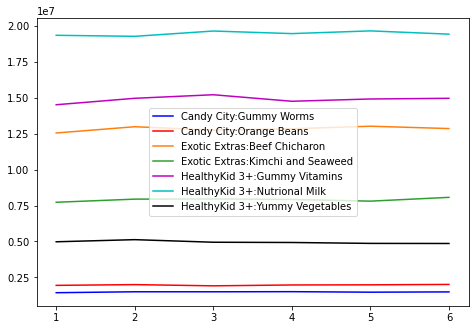

In [94]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1,])
ax.plot(list_1,final_final_plot[0],color='b',label="Candy City:Gummy Worms")
ax.plot(list_1,final_final_plot[1],color='r',label="Candy City:Orange Beans")
ax.plot(list_1,final_final_plot[2],color='tab:orange',label="Exotic Extras:Beef Chicharon")
ax.plot(list_1,final_final_plot[3],color='tab:green',label="Exotic Extras:Kimchi and Seaweed")
ax.plot(list_1,final_final_plot[4],color='m',label="HealthyKid 3+:Gummy Vitamins")
ax.plot(list_1,final_final_plot[5],color='c',label="HealthyKid 3+:Nutrional Milk")
ax.plot(list_1,final_final_plot[6],color='k',label="HealthyKid 3+:Yummy Vegetables")
ax.legend()
plt.savefig('Summary of Trends per Item (Sales Value).png', dpi=600, bbox_inches='tight')

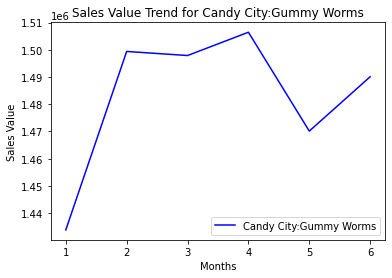

In [95]:
line1,= plt.plot(list_1,final_final_plot[0],color='b',label="Candy City:Gummy Worms")
plt.xlabel('Months')
plt.ylabel('Sales Value')
plt.title("Sales Value Trend for Candy City:Gummy Worms")
first_legend=plt.legend(handles=[line1], loc=0)
plt.savefig('Gummy Worms Sales Value', dpi=600, bbox_inches='tight')

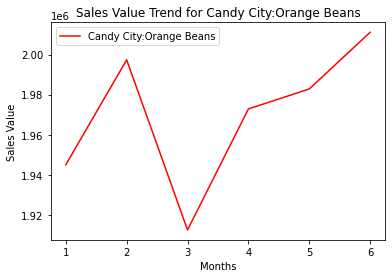

In [96]:
line2,=plt.plot(list_1,final_final_plot[1],color='r',label="Candy City:Orange Beans")
plt.xlabel('Months')
plt.ylabel('Sales Value')
plt.title("Sales Value Trend for Candy City:Orange Beans")
second_legend=plt.legend(handles=[line2], loc=0)
plt.savefig('Orange Beans Sales Value', dpi=600, bbox_inches='tight')


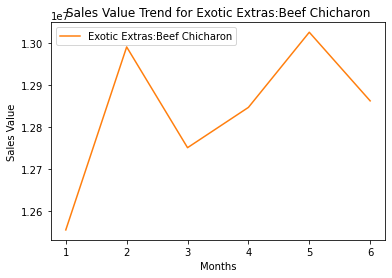

In [97]:
line3,=plt.plot(list_1,final_final_plot[2],color='tab:orange',label="Exotic Extras:Beef Chicharon")
plt.xlabel('Months')
plt.ylabel('Sales Value')
plt.title("Sales Value Trend for Exotic Extras:Beef Chicharon")
second_legend=plt.legend(handles=[line3], loc=0)
plt.savefig('Chicharon Sales Value', dpi=600, bbox_inches='tight')


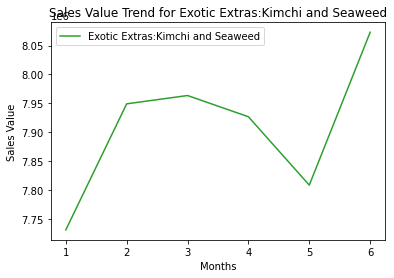

In [98]:
line4,=plt.plot(list_1,final_final_plot[3],color='tab:green',label="Exotic Extras:Kimchi and Seaweed")
plt.xlabel('Months')
plt.ylabel('Sales Value')
plt.title("Sales Value Trend for Exotic Extras:Kimchi and Seaweed")
second_legend=plt.legend(handles=[line4], loc=0)
plt.savefig('Kimchi and Seaweed Sales Value', dpi=600, bbox_inches='tight')


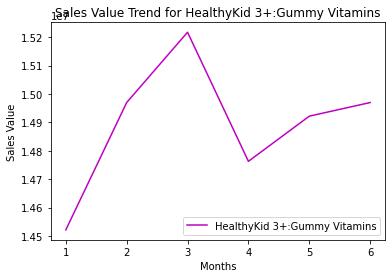

In [99]:
line5,=plt.plot(list_1,final_final_plot[4],color='m',label="HealthyKid 3+:Gummy Vitamins")
plt.xlabel('Months')
plt.ylabel('Sales Value')
plt.title("Sales Value Trend for HealthyKid 3+:Gummy Vitamins")
second_legend=plt.legend(handles=[line5], loc=0)
plt.savefig('Gummy Vitamins Sales Value', dpi=600, bbox_inches='tight')

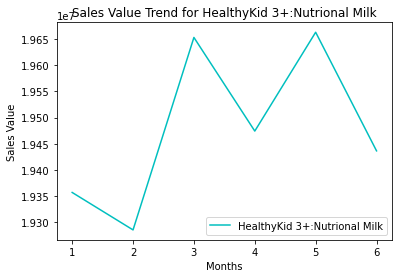

In [100]:
line6,=plt.plot(list_1,final_final_plot[5],color='c',label="HealthyKid 3+:Nutrional Milk")
plt.xlabel('Months')
plt.ylabel('Sales Value')
plt.title("Sales Value Trend for HealthyKid 3+:Nutrional Milk")
second_legend=plt.legend(handles=[line6], loc=0)
plt.savefig('Milk Sales Value', dpi=600, bbox_inches='tight')


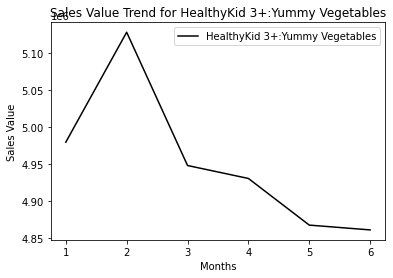

In [101]:
line7,=plt.plot(list_1,final_final_plot[6],color='k',label="HealthyKid 3+:Yummy Vegetables")
plt.xlabel('Months')
plt.ylabel('Sales Value')
plt.title("Sales Value Trend for HealthyKid 3+:Yummy Vegetables")
second_legend=plt.legend(handles=[line7], loc=0)
plt.savefig('Yummy Vegetables Sales Value', dpi=600, bbox_inches='tight')

In [ ]:
#create table for item which generated most revenue per month 

In [102]:
final_plot_2

month,1,2,3,4,5,6
0,1433850.0,1499400.0,1497900.0,1506450.0,1470150.0,1490100.0
1,1945026.0,1997363.0,1912589.0,1972886.0,1982836.0,2011094.0
2,12554835.0,12991299.0,12750984.0,12847110.0,13026372.0,12862698.0
3,7731124.0,7949251.0,7963633.0,7926879.0,7808627.0,8073096.0
4,14521500.0,14970000.0,15217500.0,14763000.0,14922000.0,14970000.0
5,19356730.0,19285090.0,19653240.0,19474140.0,19663190.0,19436330.0
6,4979500.0,5128000.0,4948000.0,4930500.0,4867500.0,4861000.0


In [103]:
final_plot_2_final = final_plot_2.assign(Items=final_sales_value_per_item_plot["Items"])

In [104]:
final_plot_2_final

month,1,2,3,4,5,6,Items
0,1433850.0,1499400.0,1497900.0,1506450.0,1470150.0,1490100.0,Candy City:Gummy Worms
1,1945026.0,1997363.0,1912589.0,1972886.0,1982836.0,2011094.0,Candy City:Orange Beans
2,12554835.0,12991299.0,12750984.0,12847110.0,13026372.0,12862698.0,Exotic Extras:Beef Chicharon
3,7731124.0,7949251.0,7963633.0,7926879.0,7808627.0,8073096.0,Exotic Extras:Kimchi and Seaweed
4,14521500.0,14970000.0,15217500.0,14763000.0,14922000.0,14970000.0,HealthyKid 3+:Gummy Vitamins
5,19356730.0,19285090.0,19653240.0,19474140.0,19663190.0,19436330.0,HealthyKid 3+:Nutrional Milk
6,4979500.0,5128000.0,4948000.0,4930500.0,4867500.0,4861000.0,HealthyKid 3+:Yummy Vegetables


In [105]:
best_selling_item_m1=final_plot_2_final['Items'].where(final_plot_2_final[1] == final_plot_2_final[1].max()).dropna().values[0]

In [106]:
best_selling_item_m1

'HealthyKid 3+:Nutrional Milk'

In [107]:
best_selling_item_m2=final_plot_2_final['Items'].where(final_plot_2_final[2] == final_plot_2_final[2].max()).dropna().values[0]
best_selling_item_m3=final_plot_2_final['Items'].where(final_plot_2_final[3] == final_plot_2_final[3].max()).dropna().values[0]
best_selling_item_m4=final_plot_2_final['Items'].where(final_plot_2_final[4] == final_plot_2_final[4].max()).dropna().values[0]
best_selling_item_m5=final_plot_2_final['Items'].where(final_plot_2_final[5] == final_plot_2_final[5].max()).dropna().values[0]
best_selling_item_m6=final_plot_2_final['Items'].where(final_plot_2_final[6] == final_plot_2_final[6].max()).dropna().values[0]

In [108]:
sales_value_max_data= {'Month': ["1","2","3","4","5","6"],"Item": [best_selling_item_m1,best_selling_item_m2,best_selling_item_m3,best_selling_item_m4,best_selling_item_m5,best_selling_item_m6],"Sales Value":[final_plot_2_final[1].max(),final_plot_2_final[2].max(),final_plot_2_final[3].max(),final_plot_2_final[4].max(),final_plot_2_final[5].max(),final_plot_2_final[6].max()]}

In [109]:
sales_value_max_data

{'Month': ['1', '2', '3', '4', '5', '6'],
 'Item': ['HealthyKid 3+:Nutrional Milk',
  'HealthyKid 3+:Nutrional Milk',
  'HealthyKid 3+:Nutrional Milk',
  'HealthyKid 3+:Nutrional Milk',
  'HealthyKid 3+:Nutrional Milk',
  'HealthyKid 3+:Nutrional Milk'],
 'Sales Value': [19356730.0,
  19285090.0,
  19653240.0,
  19474140.0,
  19663190.0,
  19436330.0]}

In [110]:
best_selling_item_per_month = pd.DataFrame.from_dict(sales_value_max_data, orient='index')

In [111]:
best_selling_item_per_month_1=best_selling_item_per_month.transpose()
best_selling_item_per_month_1= best_selling_item_per_month_1.set_index('Month')
best_selling_item_per_month_1


,Item,Sales Value
Month,,
1,HealthyKid 3+:Nutrional Milk,19356730.0
2,HealthyKid 3+:Nutrional Milk,19285090.0
3,HealthyKid 3+:Nutrional Milk,19653240.0
4,HealthyKid 3+:Nutrional Milk,19474140.0
5,HealthyKid 3+:Nutrional Milk,19663190.0
6,HealthyKid 3+:Nutrional Milk,19436330.0


In [112]:
#create table for item which generated least revenue per month 

In [113]:
least_selling_item_m1=final_plot_2_final['Items'].where(final_plot_2_final[1] == final_plot_2_final[1].min()).dropna().values[0]

In [114]:
least_selling_item_m2=final_plot_2_final['Items'].where(final_plot_2_final[2] == final_plot_2_final[2].min()).dropna().values[0]
least_selling_item_m3=final_plot_2_final['Items'].where(final_plot_2_final[3] == final_plot_2_final[3].min()).dropna().values[0]
least_selling_item_m4=final_plot_2_final['Items'].where(final_plot_2_final[4] == final_plot_2_final[4].min()).dropna().values[0]
least_selling_item_m5=final_plot_2_final['Items'].where(final_plot_2_final[5] == final_plot_2_final[5].min()).dropna().values[0]
least_selling_item_m6=final_plot_2_final['Items'].where(final_plot_2_final[6] == final_plot_2_final[6].min()).dropna().values[0]

In [115]:
sales_value_min_data= {'Month': ["1","2","3","4","5","6"],"Item": [least_selling_item_m1,least_selling_item_m2,least_selling_item_m3,least_selling_item_m4,least_selling_item_m5,least_selling_item_m6],"Sales Value":[final_plot_2_final[1].min(),final_plot_2_final[2].min(),final_plot_2_final[3].min(),final_plot_2_final[4].min(),final_plot_2_final[5].min(),final_plot_2_final[6].min()]}

In [116]:
least_selling_item_per_month = pd.DataFrame.from_dict(sales_value_min_data, orient='index')

In [117]:
least_selling_item_per_month_1=least_selling_item_per_month.transpose()
least_selling_item_per_month_1= least_selling_item_per_month_1.set_index('Month')
least_selling_item_per_month_1


,Item,Sales Value
Month,,
1,Candy City:Gummy Worms,1433850.0
2,Candy City:Gummy Worms,1499400.0
3,Candy City:Gummy Worms,1497900.0
4,Candy City:Gummy Worms,1506450.0
5,Candy City:Gummy Worms,1470150.0
6,Candy City:Gummy Worms,1490100.0


In [ ]:
#create table for top selling month (month with most purchases) for a specific item 

In [118]:
final_plot_2

month,1,2,3,4,5,6
0,1433850.0,1499400.0,1497900.0,1506450.0,1470150.0,1490100.0
1,1945026.0,1997363.0,1912589.0,1972886.0,1982836.0,2011094.0
2,12554835.0,12991299.0,12750984.0,12847110.0,13026372.0,12862698.0
3,7731124.0,7949251.0,7963633.0,7926879.0,7808627.0,8073096.0
4,14521500.0,14970000.0,15217500.0,14763000.0,14922000.0,14970000.0
5,19356730.0,19285090.0,19653240.0,19474140.0,19663190.0,19436330.0
6,4979500.0,5128000.0,4948000.0,4930500.0,4867500.0,4861000.0


In [119]:
best_selling_month_per_item = final_plot_2.idxmax(axis = 1)

In [120]:
best_selling_month_per_item 

0    4
1    6
2    5
3    6
4    3
5    5
6    2
dtype: int64

In [121]:
best_selling_month_per_item_1 = pd.DataFrame(best_selling_month_per_item , columns=['Best-Selling Month'])

In [122]:
best_selling_month_per_item_1

,Best-Selling Month
0,4
1,6
2,5
3,6
4,3
5,5
6,2


In [123]:
best_selling_month_per_item_1= best_selling_month_per_item_1.assign(Count=final_plot_2.max(axis = 1))

In [124]:
best_selling_month_per_item_1=best_selling_month_per_item_1.assign(Items=final_plot_2_final["Items"])

In [125]:
best_selling_month_per_item_1

,Best-Selling Month,Count,Items
0,4,1506450.0,Candy City:Gummy Worms
1,6,2011094.0,Candy City:Orange Beans
2,5,13026372.0,Exotic Extras:Beef Chicharon
3,6,8073096.0,Exotic Extras:Kimchi and Seaweed
4,3,15217500.0,HealthyKid 3+:Gummy Vitamins
5,5,19663190.0,HealthyKid 3+:Nutrional Milk
6,2,5128000.0,HealthyKid 3+:Yummy Vegetables


In [126]:
best_selling_month_per_item_1=best_selling_month_per_item_1[["Items","Best-Selling Month","Count"]]

In [127]:
best_selling_month_per_item_1= best_selling_month_per_item_1.set_index('Items')

In [128]:
best_selling_month_per_item_1

,Best-Selling Month,Count
Items,,
Candy City:Gummy Worms,4,1506450.0
Candy City:Orange Beans,6,2011094.0
Exotic Extras:Beef Chicharon,5,13026372.0
Exotic Extras:Kimchi and Seaweed,6,8073096.0
HealthyKid 3+:Gummy Vitamins,3,15217500.0
HealthyKid 3+:Nutrional Milk,5,19663190.0
HealthyKid 3+:Yummy Vegetables,2,5128000.0


In [129]:
best_selling_month_per_item_1=best_selling_month_per_item_1.rename(columns={'Count': 'Sales Value'})

In [130]:
best_selling_month_per_item_1

,Best-Selling Month,Sales Value
Items,,
Candy City:Gummy Worms,4,1506450.0
Candy City:Orange Beans,6,2011094.0
Exotic Extras:Beef Chicharon,5,13026372.0
Exotic Extras:Kimchi and Seaweed,6,8073096.0
HealthyKid 3+:Gummy Vitamins,3,15217500.0
HealthyKid 3+:Nutrional Milk,5,19663190.0
HealthyKid 3+:Yummy Vegetables,2,5128000.0


In [ ]:
#create table for least selling month (month with most purchases) for a specific item 

In [131]:
least_selling_month_per_item = final_plot_2.idxmin(axis = 1)

In [132]:
least_selling_month_per_item_1 = pd.DataFrame(least_selling_month_per_item , columns=['Least-Selling Month'])

In [133]:
least_selling_month_per_item_1= least_selling_month_per_item_1.assign(Count=final_plot_2.min(axis = 1))

In [134]:
least_selling_month_per_item_1=least_selling_month_per_item_1.assign(Items=final_plot_2_final["Items"])

In [135]:
least_selling_month_per_item_1=least_selling_month_per_item_1[["Items","Least-Selling Month","Count"]]

In [136]:
least_selling_month_per_item_1= least_selling_month_per_item_1.set_index('Items')

In [137]:
least_selling_month_per_item_1

,Least-Selling Month,Count
Items,,
Candy City:Gummy Worms,1,1433850.0
Candy City:Orange Beans,3,1912589.0
Exotic Extras:Beef Chicharon,1,12554835.0
Exotic Extras:Kimchi and Seaweed,1,7731124.0
HealthyKid 3+:Gummy Vitamins,1,14521500.0
HealthyKid 3+:Nutrional Milk,2,19285090.0
HealthyKid 3+:Yummy Vegetables,6,4861000.0


In [138]:
least_selling_month_per_item_1=least_selling_month_per_item_1.rename(columns={'Count': 'Sales Value'})

In [139]:
least_selling_month_per_item_1

,Least-Selling Month,Sales Value
Items,,
Candy City:Gummy Worms,1,1433850.0
Candy City:Orange Beans,3,1912589.0
Exotic Extras:Beef Chicharon,1,12554835.0
Exotic Extras:Kimchi and Seaweed,1,7731124.0
HealthyKid 3+:Gummy Vitamins,1,14521500.0
HealthyKid 3+:Nutrional Milk,2,19285090.0
HealthyKid 3+:Yummy Vegetables,6,4861000.0


In [152]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [153]:
import dataframe_image as dfi

In [154]:
final_sales_value_per_item

Sales Value                          \
month                                      1           2           3   
Items                                                                  
Candy City:Gummy Worms             1433850.0   1499400.0   1497900.0   
Candy City:Orange Beans            1945026.0   1997363.0   1912589.0   
Exotic Extras:Beef Chicharon      12554835.0  12991299.0  12750984.0   
Exotic Extras:Kimchi and Seaweed   7731124.0   7949251.0   7963633.0   
HealthyKid 3+:Gummy Vitamins      14521500.0  14970000.0  15217500.0   
HealthyKid 3+:Nutrional Milk      19356730.0  19285090.0  19653240.0   
HealthyKid 3+:Yummy Vegetables     4979500.0   5128000.0   4948000.0   

                                                                      
month                                      4           5           6  
Items                                                                 
Candy City:Gummy Worms             1506450.0   1470150.0   1490100.0  
Candy City:Orange Beans            1972886.0   1982836.0   2011094.0  
Exotic Extras:Beef Chicharon      12847110.0  13026372.0  12862698.0  
Exotic Extras:Kimchi and Seaweed   7926879.0   7808627.0   8073096.0  
HealthyKid 3+:Gummy Vitamins      14763000.0  14922000.0  14970000.0  
HealthyKid 3+:Nutrional Milk      19474140.0  19663190.0  19436330.0  
HealthyKid 3+:Yummy Vegetables     4930500.0   4867500.0   4861000.0

In [155]:
dfi.export(final_sales_value_per_item,"final_sales_value_per_item")

[0724/144123.580064:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpbxf0nqz_/temp.png.


In [163]:
best_selling_item_per_month_1

,Item,Sales Value
Month,,
1,HealthyKid 3+:Nutrional Milk,19356730.0
2,HealthyKid 3+:Nutrional Milk,19285090.0
3,HealthyKid 3+:Nutrional Milk,19653240.0
4,HealthyKid 3+:Nutrional Milk,19474140.0
5,HealthyKid 3+:Nutrional Milk,19663190.0
6,HealthyKid 3+:Nutrional Milk,19436330.0


In [164]:
dfi.export(best_selling_item_per_month_1,"best_selling_item_per_month_1 (SV)")

[0724/144611.556760:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpz_3x_xtx/temp.png.


In [165]:
least_selling_item_per_month_1

,Item,Sales Value
Month,,
1,Candy City:Gummy Worms,1433850.0
2,Candy City:Gummy Worms,1499400.0
3,Candy City:Gummy Worms,1497900.0
4,Candy City:Gummy Worms,1506450.0
5,Candy City:Gummy Worms,1470150.0
6,Candy City:Gummy Worms,1490100.0


In [166]:
dfi.export(least_selling_item_per_month_1,"least_selling_item_per_month_1 (SV)")

[0724/144630.693916:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpozaajy5u/temp.png.


In [167]:
best_selling_month_per_item_1

,Best-Selling Month,Sales Value
Items,,
Candy City:Gummy Worms,4,1506450.0
Candy City:Orange Beans,6,2011094.0
Exotic Extras:Beef Chicharon,5,13026372.0
Exotic Extras:Kimchi and Seaweed,6,8073096.0
HealthyKid 3+:Gummy Vitamins,3,15217500.0
HealthyKid 3+:Nutrional Milk,5,19663190.0
HealthyKid 3+:Yummy Vegetables,2,5128000.0


In [169]:
dfi.export(best_selling_month_per_item_1,"best_selling_month_per_item_1 (SV)")

[0724/144706.814001:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpnzluhu20/temp.png.


In [168]:
least_selling_month_per_item_1

,Least-Selling Month,Sales Value
Items,,
Candy City:Gummy Worms,1,1433850.0
Candy City:Orange Beans,3,1912589.0
Exotic Extras:Beef Chicharon,1,12554835.0
Exotic Extras:Kimchi and Seaweed,1,7731124.0
HealthyKid 3+:Gummy Vitamins,1,14521500.0
HealthyKid 3+:Nutrional Milk,2,19285090.0
HealthyKid 3+:Yummy Vegetables,6,4861000.0


In [170]:
dfi.export(least_selling_month_per_item_1,"least_selling_month_per_item_1 (SV)")

[0724/144723.244964:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmp5v_92732/temp.png.
